In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, DateTime, String

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
# Starting from the most recent data point in the database. 

start_date = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
date = start_date.strftime('%Y-%m-%d')
print(date)

2016-08-23


In [11]:
# Perform a query to retrieve the date and precipitation scores
last_12_months_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
last_12_months_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_months_prcp_df = pd.DataFrame(last_12_months_prcp)
last_12_months_prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [13]:
last_12_months_prcp_df_index = last_12_months_prcp_df.set_index('date')

In [14]:
# Sort the dataframe by date
last_12_months_prcp_df_index_sort = last_12_months_prcp_df_index.sort_values(by='date')
last_12_months_prcp_df_index_sort.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


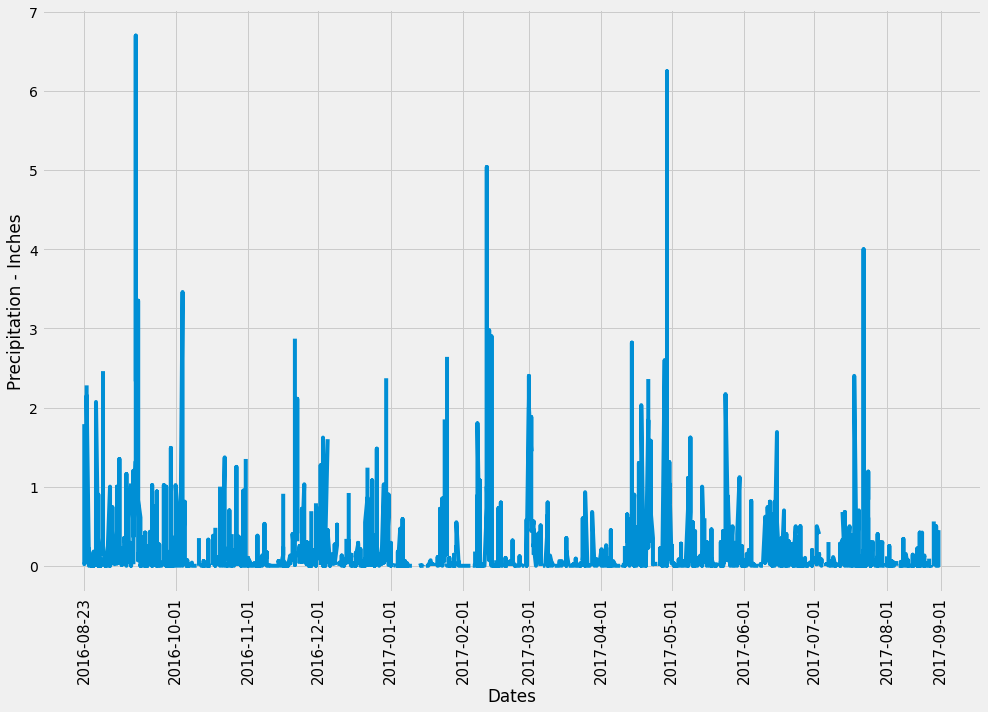

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(15, 10))
plt.plot(last_12_months_prcp_df_index_sort.index, last_12_months_prcp_df_index_sort['prcp'])
xloc = ['2016-08-23', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01','2017-03-01','2017-04-01', '2017-05-01', '2017-06-01','2017-07-01','2017-08-01', '2017-09-01'] 
plt.xticks(xloc, rotation='vertical',fontsize=15)
plt.xlabel('Dates')
plt.ylabel("Precipitation - Inches")
plt.savefig("./Images/precipitation.png")

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_mean = last_12_months_prcp_df_index_sort.groupby('date').mean()['prcp']
prcp_median = last_12_months_prcp_df_index_sort.groupby('date').median()['prcp']
prcp_var = last_12_months_prcp_df_index_sort.groupby('date').var()['prcp']
prcp_std = last_12_months_prcp_df_index_sort.groupby('date').std()['prcp']
prcp_sem = last_12_months_prcp_df_index_sort.groupby('date').sem()['prcp']

sum_stat = pd.DataFrame({
    'Mean prcp': prcp_mean, 
    'Median prcp': prcp_median,
    'prcp Variance': prcp_var,
    'prcp Std. Dev.': prcp_std,
    'prcp Std. Err.': prcp_sem
    })

sum_stat

,Mean prcp,Median prcp,prcp Variance,prcp Std. Dev.,prcp Std. Err.
date,,,,,
2016-08-23,0.451667,0.100,0.499097,0.706468,0.288414
2016-08-24,1.555000,1.800,0.706510,0.840541,0.343150
2016-08-25,0.077143,0.080,0.005157,0.071813,0.027143
2016-08-26,0.016667,0.015,0.000267,0.016330,0.006667
2016-08-27,0.064000,0.020,0.006680,0.081731,0.036551
...,...,...,...,...,...
2017-08-19,0.030000,0.000,0.002700,0.051962,0.030000
2017-08-20,0.005000,0.005,0.000050,0.007071,0.005000
2017-08-21,0.193333,0.020,0.100933,0.317700,0.183424


In [17]:
last_12_months_prcp_df_index_sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.station).count()
print(stations)

9


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_count


[('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00513117', 2696),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_max = session.query(Measurement.station, func.max(Measurement.tobs)).filter_by(station = 'USC00519281').all()

active_station_max

[('USC00519281', 85.0)]

In [21]:
active_station_mean = session.query(Measurement.station, func.avg(Measurement.tobs)).filter_by(station = 'USC00519281').all()
active_station_mean

[('USC00519281', 71.66378066378067)]

In [22]:
active_station_min = session.query(Measurement.station, func.min(Measurement.tobs)).filter_by(station = 'USC00519281').all()
    
active_station_min

[('USC00519281', 54.0)]

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp = session.query(Measurement.date, Measurement.tobs).\
    filter_by(station = 'USC00519281').filter(Measurement.date>='2016-08-23').all()

active_station_temp_df = pd.DataFrame(active_station_temp)

active_station_temp_df_index = active_station_temp_df.set_index('date')

active_station_temp_df_index_sort = active_station_temp_df_index.sort_values(by='date')
active_station_temp_df_index_sort.head()


,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


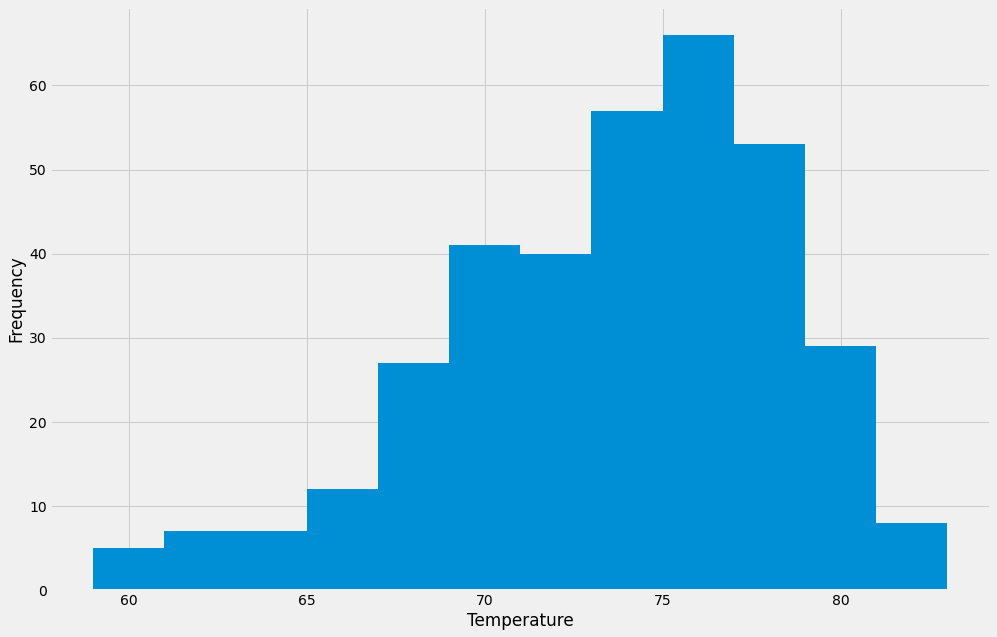

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15, 10))

# Define the number of bins you want to create
num_bins = 12

# Use numpy.histogram to bin the data
counts, bins = np.histogram(active_station_temp_df_index_sort, bins=num_bins)

# Plot the histogram using matplotlib
plt.hist(active_station_temp_df_index_sort, bins=bins)

plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.savefig("./images/tobs.png")

# Close session

In [25]:
# Close Session
session.close()